<a href="https://colab.research.google.com/github/dlim76/HSE_Python_Project/blob/main/project_BPM245.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

No categorical features found. Nothing to change

Данные успешно загружены. Первые 5 строк:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.5

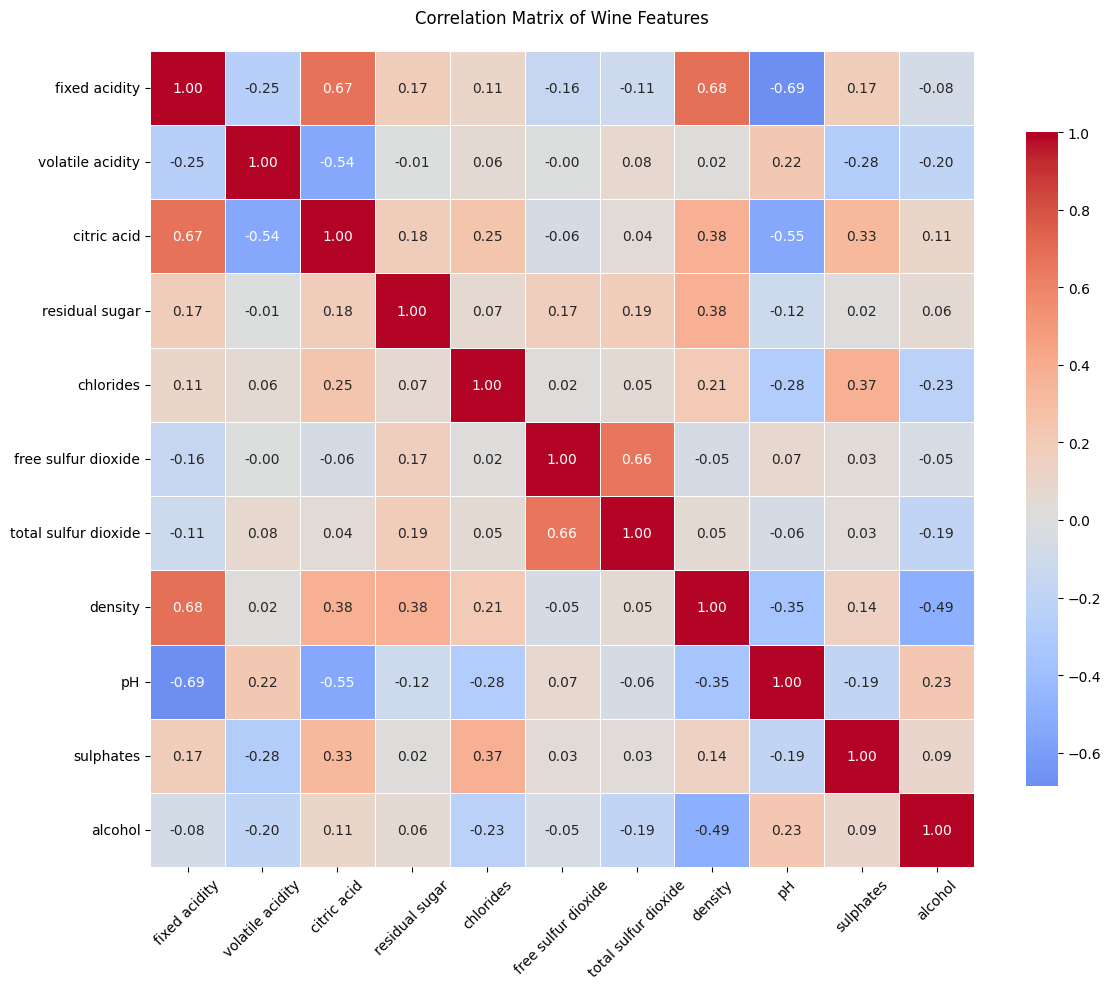

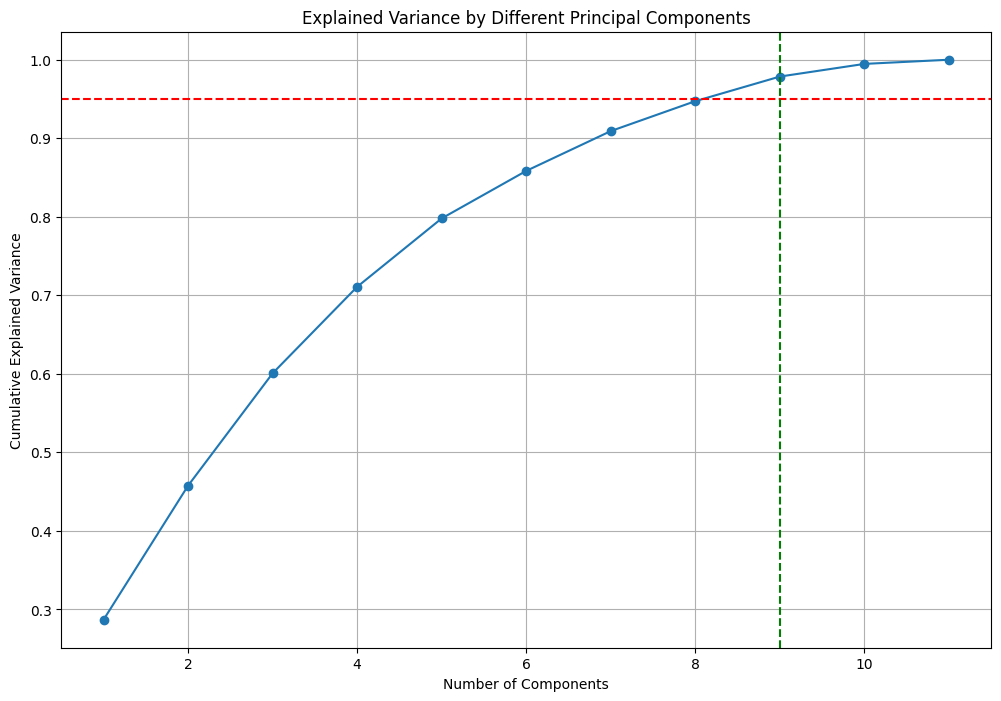


Оптимальное число главных компонент (объясняют 95% дисперсии): 9

Объясненная дисперсия для 9 компонент: 0.98


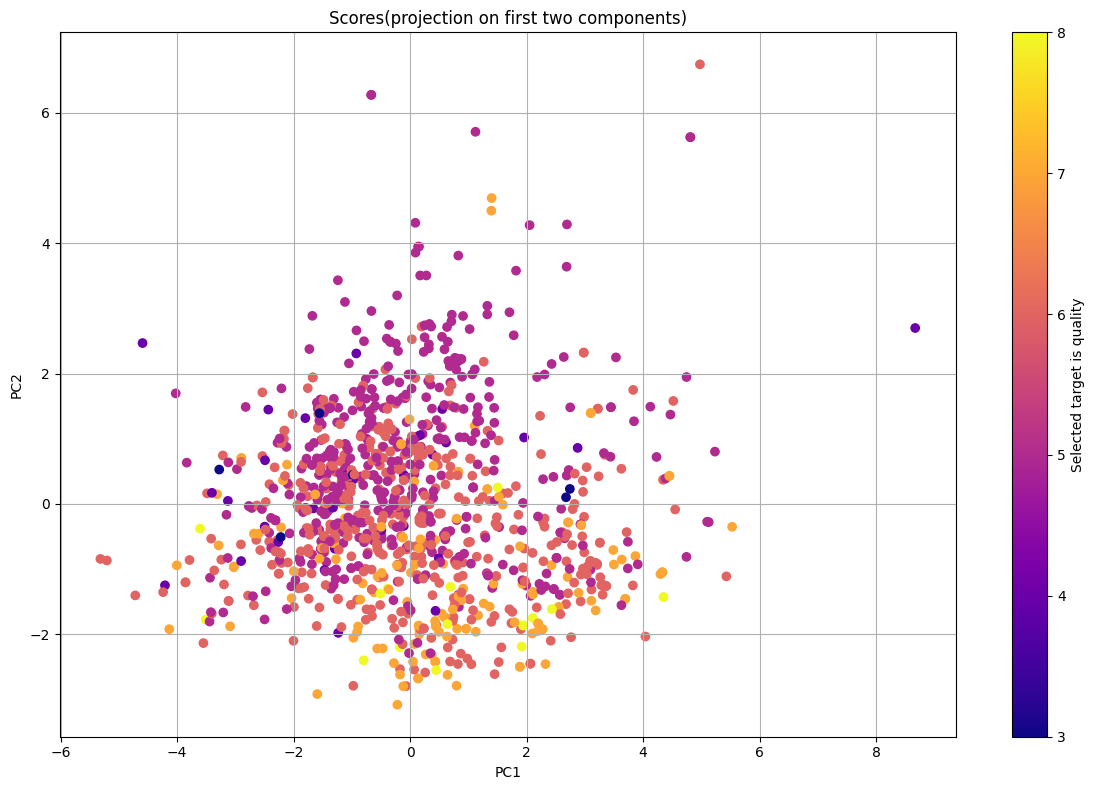

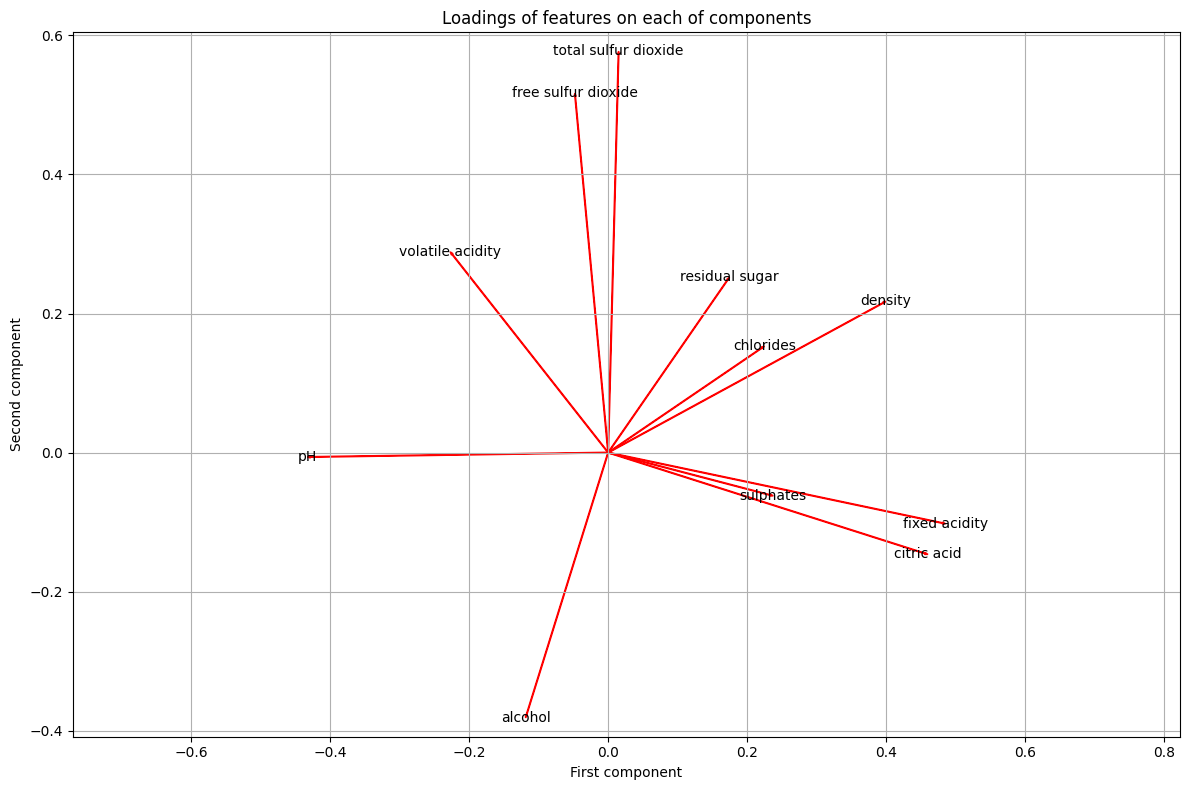

Silhouette Score (k=2): 0.404 — Clusters separation is bad
Silhouette Score (k=3): 0.372 — Clusters separation is bad
Silhouette Score (k=4): 0.372 — Clusters separation is bad
Silhouette Score (k=5): 0.372 — Clusters separation is bad
Silhouette Score (k=6): 0.340 — Clusters separation is bad
Silhouette Score (k=7): 0.314 — Clusters separation is bad
Silhouette Score (k=8): 0.353 — Clusters separation is bad
Silhouette Score (k=9): 0.341 — Clusters separation is bad
Silhouette Score (k=10): 0.347 — Clusters separation is bad
Silhouette Score (k=11): 0.351 — Clusters separation is bad
Silhouette Score (k=12): 0.337 — Clusters separation is bad
Silhouette Score (k=13): 0.344 — Clusters separation is bad
Silhouette Score (k=14): 0.339 — Clusters separation is bad
Silhouette Score (k=15): 0.343 — Clusters separation is bad
Silhouette Score (k=16): 0.331 — Clusters separation is bad
Silhouette Score (k=17): 0.332 — Clusters separation is bad
Silhouette Score (k=18): 0.336 — Clusters separa

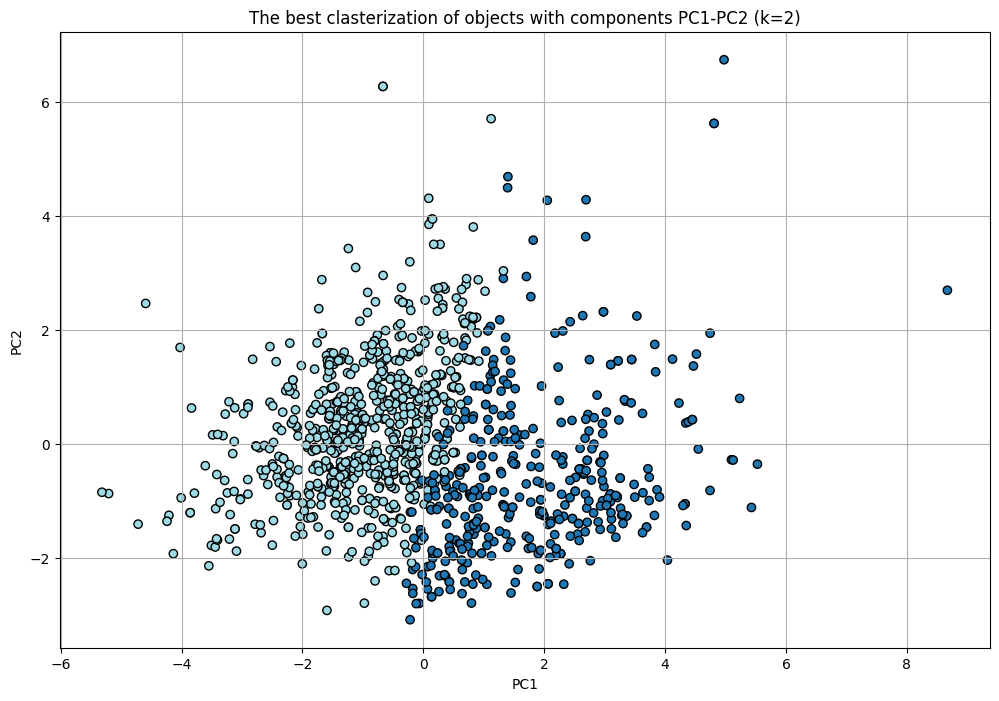

In [ ]:
#2. Преобразование данных и 3. Предобработка (центрирование и нормирование)
def preprocess_data(data):


    # Разделение на признаки и целевую переменную
    X = data.drop(['quality', 'Id'], axis=1)  # Исключаем целевую переменную и ID
    y = data['quality']


    # Нормировка данных (нужна, чтобы "усреднить" стандартное отклонение, тем самым напрямую ускоряет)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X) #стандартизированная матрица признаков.

    return X_scaled, y, X.columns

# В данном датасете все колонки числовые, поэтому удалять никакие столбцы не пришлось, но преобразование все равно реализовано

def encode_categories(data):
    categories_col = data.select_dtypes(include = ['object', 'category']).columns

    if len(categories_col) == 0:
        print("No categorical features found. Nothing to change\n")
        return data
    print(f"Categorical features: {list(categories_col)}")

    encoded_data = pd.get_dummies(data, columns = categories_col, drop_first = True)
    return encoded_data



#4. Получение статистик по набору данных
def get_statistics(data):
    stats = {
        'describe': data.describe(), # описательная статистика (среднее, мин, макс и т. д.)
        'correlation': data.corr(), #корреляционная матрица
        'null_values': data.isnull().sum(), #количество пропусков
        'dtypes': data.dtypes # типы данных
    }
    return stats


#5. Применение метода главных компонент с использованием sklearn.decomposition.PCA
def apply_pca(X_scaled, n_components=None):

    if n_components is None:
        pca = PCA()  # Если число компонент не задано, вычисляем все
    else:
        pca = PCA(n_components=n_components)  # Иначе используем заданное число. Выделяем главные компоненты

    principal_components = pca.fit_transform(X_scaled) #Each string is projection of original ohbject on main components
    return pca, principal_components # pca - обученная модель, principal_components – матрица главных компонент

def find_optimal_components(pca, threshold=0.95):
    explained_variance = pca.explained_variance_ratio_ # доля объясненной дисперсии для каждой компоненты
    cumulative_variance = np.cumsum(explained_variance) # кумулятивная сумма объясненной дисперсии

    # Находим минимальное число компонент, объясняющих threshold дисперсии
    n_components = np.argmax(cumulative_variance >= threshold) + 1

    # Визуализация
    plt.figure(figsize=(12, 8))
    plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
    plt.axhline(y=threshold, color='r', linestyle='--')
    plt.axvline(x=n_components, color='g', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by Different Principal Components')
    plt.grid()
    plt.show()

    return n_components


def plot_correlation_matrix(data):
    """
    Визуализирует корреляционную матрицу с помощью тепловой карты
    """
    # Вычисляем корреляционную матрицу
    corr = data.corr()

    # Создаем фигуру
    plt.figure(figsize=(12, 10))

    # Генерируем тепловую карту
    sns.heatmap(corr,
                annot=True,
                fmt=".2f",
                cmap='coolwarm',
                center=0,
                linewidths=0.5,
                cbar_kws={"shrink": 0.8})

    plt.title('Correlation Matrix of Wine Features', pad=20)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


def analyze_data(file_path):
    # 1. Загрузка данных и проверка категориальных столбцов, требующих шифровки
    data = pd.read_csv(file_path)
    data = encode_categories(data)
    print("Данные успешно загружены. Первые 5 строк:")
    print(data.head())


    # 2-3. Предобработка данных
    X_scaled, y, feature_names = preprocess_data(data)
    print("\nДанные после масштабирования (первые 5 строк):")
    print(X_scaled[:5])

    # 4. Статистики
    stats = get_statistics(data)
    print("\nОсновные статистики:")
    print(stats['describe'])
    print("\nКорреляционная матрица:")
    plot_correlation_matrix(data.drop(['quality', 'Id'], axis=1))

    # 5. PCA анализ
    pca, principal_components = apply_pca(X_scaled)

    # Определение оптимального числа компонент
    optimal_n = find_optimal_components(pca)
    print(f"\nОптимальное число главных компонент (объясняют 95% дисперсии): {optimal_n}")

    # Применение PCA с оптимальным числом компонент
    pca_optimal, pc_optimal = apply_pca(X_scaled, optimal_n)
    print(f"\nОбъясненная дисперсия для {optimal_n} компонент: {np.sum(pca_optimal.explained_variance_ratio_):.2f}")

    # Возвращаем все результаты для дальнейшего использования
    return {
        'data': data,
        'X_scaled': X_scaled,
        'y': y,
        'stats': stats,
        'pca': pca,
        'principal_components': principal_components,
        'optimal_n': optimal_n,
        'pca_optimal': pca_optimal,
        'pc_optimal': pc_optimal
    }



def plots_scores_and_loadings(scores, loadings, names, y=None):

    plt.figure(figsize = (12, 8))#Coordinates of objects in new system of main components
    if y is not None:
        plot_1 = plt.scatter(scores[:,0], scores[:,1], c = y, cmap = 'plasma')#PC1 and PC2 are the most valuable components, so we are gettin max inf from them
        plt.colorbar(plot_1, label = "Selected target is quality")#Color of each dot sepends on selected target(btw the target is changeable)

    else:
        plot_1 = plt.scatter(scores[:,0], scores[:,1])

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Scores(projection on first two components)')#If point is far from others, it means that in this 2 features(main components in our case) he is way different
    plt.grid(True)
    plt.tight_layout()
    plt.show()



    plt.figure(figsize = (12, 8))#Arrows that show connection of features and components(how components are influence on new main features)

    for i, name in enumerate(names):

        plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color = 'red', length_includes_head=True)#Also took first 2 columns
        plt.text(loadings[i, 0], loadings[i, 1], name, color = 'black', ha='center', va='center', fontsize=10)

    plt.xlabel('First component')#First of two of main components on ox
    plt.ylabel('Second component')#Second of two of main components on oy
    plt.title('Loadings of features on each of components')#Value of each feature on both components(can be negative). Shows which features are making main components stronger. Length and direction of arrow shows value and type of influence(negative, positive ect)
    plt.grid(True)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


#Clasterization
def plot_clusters(scores, n_clusters):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 0)#Randomly generate n_clasters centroids(but parameter random_state = 0). After that each point connects co nearest centroid
    clusters = kmeans.fit_predict(scores[:, :])#First two main components for each point(only points that depends on this 2 components). Give to each point a nearest cluster label

    plt.figure(figsize=(12,8))
    plt.scatter(scores[:, 0], scores[:, 1], c=clusters, cmap='tab20', edgecolor='k')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'The best clasterization of objects with components PC1-PC2 (k={n_clusters})')
    plt.grid(True)
    plt.show()



#Func that shows quality of objects fit their clusters(Silhouette Score)

def cluster_silhouette(scores, n_clusters):
    kmeans = KMeans(n_clusters, random_state = 0)
    clusters = kmeans.fit_predict(scores[:, :2])
    quality = silhouette_score(scores[:, :2], clusters)

    if quality > 0.8:
        status = "Cluster separation is very good"
    elif quality > 0.5:
        status = "Clusters separation is good"
    elif quality > 0.3:
        status = "Clusters separation is bad"
    else:
        status = "Clusters overlap or arn't visible"


    print(f"Silhouette Score (k={n_clusters}): {quality:.3f} — {status}")
    return quality, status


#Searching for best number of clusters to get the best Silhouette Score
def best_cluster_number(scores):

    best_score = -1
    best_k = 2;

    for i in range(2, 22):

        quality, status = cluster_silhouette(scores, i)
        if quality > best_score:#Searching for the best Silhouette Score
            best_score = quality
            best_k = i

    print(f"\nBest Silhouette Score = {best_score:.3f} reaches with cluster numbers: k={best_k}")
    return best_k







# Пример использования
if __name__ == "__main__":

    results = analyze_data('WineQT.csv')

    data = results['data']
    scores = results['pc_optimal']#Formated matrix(already without any categories)
    loadings = results['pca_optimal'].components_.T #Selected components are depending on finding optimal ammount of componnents to have good dispersion
    features = results['X_scaled'].shape[1] #We got number of columns of all the categories(may be usefull)
    names = results['data'].drop(['quality', 'Id'], axis=1).columns #Now we got names of features except categories
    y = data['quality']


    plots_scores_and_loadings(scores, loadings, names, y = results['y'])#Plot of scores and loadings

    n_clusters = best_cluster_number(scores)

    plot_clusters(scores, n_clusters)#Plot of clusters







